In [3]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from utilities import *
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

In [2]:
def model(X, W, b):
	Z = X.dot(W) + b
	A = 1 / (1 + np.exp(-Z))
	return (A)

def cost(A, y):
	return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

def gradients(A, X, y):
	dW = 1 / len(y) * np.dot(X.T, A - y)
	db = 1 / len(y) * np.sum(A - y)
	return (dW, db)

def update(dW, db, W, b, learning_rate):
	W = W - learning_rate * dW
	b = b - learning_rate * db
	return (W, b)

def predict(X, W, b):
	A = model(X, W, b)
	print(A)
	return A >= 0.5


def artificial_neuron(X, y, W, b, learning_rate = 0.1, n_iteration = 100):
	history = []
	Loss = []
	
	for i in range(n_iteration):
		A = model(X, W, b)
		Loss.append(cost(A, y))
		dW, db = gradients(A, X, y)
		W, b = update(dW, db, W, b, learning_rate)
		history.append([W, b, Loss, i])

	y_pred = predict(X, W, b)
	print(accuracy_score(y, y_pred))

	plt.plot(Loss)
	plt.show()

	return (W, b)


### Cats or Dogs

Here we are use the neuron created in *neuron.ipynb* for check if animals are cats or dogs.
1 = dog
0 = cat

In [5]:
X_train, y_train, X_test, y_test = load_data()

print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))
(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


In [ ]:
X_train_reshape = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

In [14]:
def init(X):
	W = np.random.randn(X.shape[1], 1)
	b = np.random.randn(1)
	return (W, b)

dimension de x :  (100, 2)
dimension de y :  (100, 1)


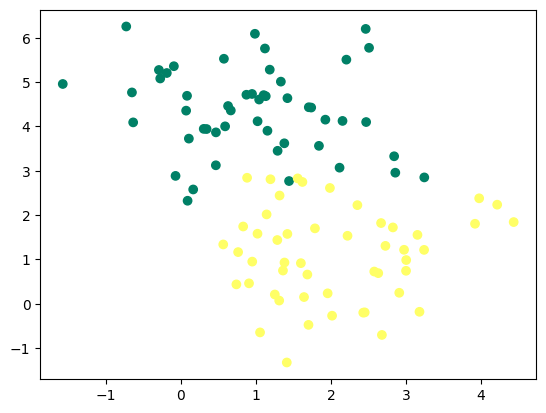

In [26]:
# Generate defaults plants and toxicity
x_plant, y_plant = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y_plant = y_plant.reshape((y_plant.shape[0], 1))
print('dimension de x : ', x_plant.shape)
print('dimension de y : ', y_plant.shape)

# Graphics
plt.scatter(x_plant[:,0], x_plant[:,1], c=y_plant, cmap='summer')
plt.show

W, b = init(x_plant)
A = model(x_plant, W, b)

[[9.67484767e-01]
 [9.69412683e-01]
 [1.21593589e-03]
 [2.70621720e-01]
 [9.87567637e-01]
 [3.83936520e-01]
 [2.88475423e-02]
 [9.46281018e-01]
 [2.33164914e-02]
 [9.86547255e-01]
 [1.01111556e-02]
 [9.79471487e-01]
 [3.65894496e-03]
 [7.01902692e-03]
 [8.75301447e-01]
 [9.87596737e-01]
 [9.99107270e-01]
 [1.95539537e-02]
 [9.65456457e-01]
 [8.75120705e-01]
 [1.09751470e-02]
 [1.27090407e-02]
 [5.08012299e-01]
 [1.04704627e-03]
 [9.90471914e-01]
 [7.94466981e-03]
 [9.90245527e-01]
 [6.24819185e-04]
 [1.59822111e-02]
 [8.19134266e-01]
 [9.98154058e-01]
 [1.16061861e-02]
 [9.27583833e-01]
 [9.98168158e-01]
 [4.37534603e-01]
 [8.51042127e-02]
 [9.53831723e-01]
 [5.95451527e-01]
 [4.08530258e-01]
 [8.02957932e-01]
 [9.59916053e-02]
 [5.42544486e-03]
 [7.88338182e-05]
 [1.00827669e-01]
 [2.33836815e-01]
 [9.37997974e-01]
 [9.97532540e-01]
 [9.97721899e-01]
 [1.52254535e-03]
 [1.22074186e-03]
 [9.93060000e-01]
 [8.74499561e-01]
 [2.27497194e-03]
 [7.15816798e-03]
 [7.70022306e-01]
 [1.019236

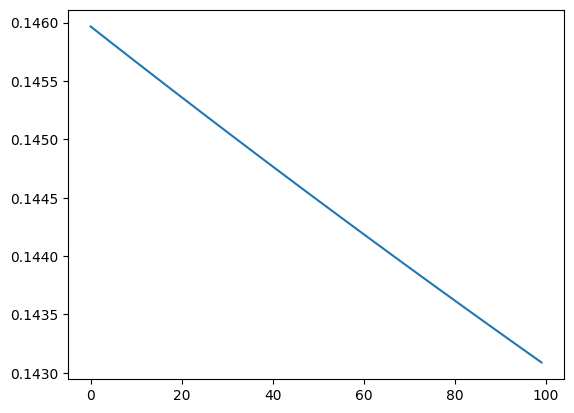

In [37]:
W, b = artificial_neuron(x_plant, y_plant, W, b)	

/var/folders/py/6ssyzsqd3c18gsvqqxmygmph0000gn/T/ipykernel_16551/2135579782.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(new_plant[0], new_plant[1], c='r', cmap='summer')


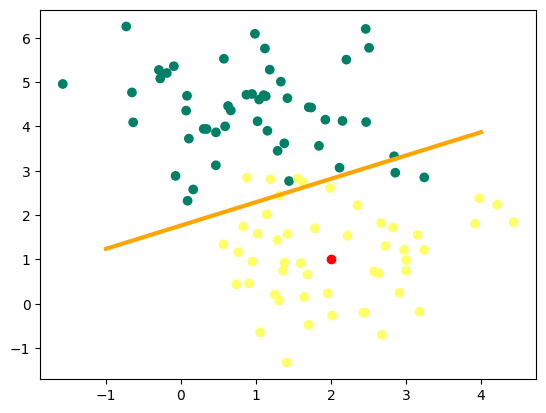

[0.97133267]


array([ True])

In [43]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

plt.scatter(x_plant[:, 0], x_plant[:, 1], c=y_plant, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r', cmap='summer')
plt.plot(x0, x1, c='orange', lw=3)
plt.show()
predict(new_plant, W, b)